# Data Loading

In [228]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score


In [229]:
import pickle

def loadDataPickle(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [230]:
pickleLE = loadDataPickle('WikipediaMovieDatasetLE.pickle')
moviesLE = pd.DataFrame(pickleLE)
moviesLE.head()

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,Release Month,Release Year,Age Rating,SentimentScore,Budget,Box Office Status
0,0.491282,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,9,2009,5,0.642857,20000000,1
1,-0.027106,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,1,2010,3,0.830000,19000000,0
2,-0.240635,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,10,2009,5,0.780000,18000000,0
3,0.132929,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,1,2010,5,0.880000,80000000,0
4,-0.152381,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,12,2009,3,0.580000,28000000,0


In [231]:
pickleOHE = loadDataPickle('WikipediaMovieDatasetOHE.pickle')
moviesOHE = pd.DataFrame(pickleOHE)
moviesOHE.head()

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,...,Release Year,SentimentScore,Budget,Age Rating_G,Age Rating_NC-17,Age Rating_Not Rated,Age Rating_PG,Age Rating_PG-13,Age Rating_R,Box Office Status
0,0.491282,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,...,2009,0.642857,20000000,0,0,0,0,0,1,1
1,-0.027106,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,...,2010,0.830000,19000000,0,0,0,1,0,0,0
2,-0.240635,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,...,2009,0.780000,18000000,0,0,0,0,0,1,0
3,0.132929,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,...,2010,0.880000,80000000,0,0,0,0,0,1,0
4,-0.152381,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,...,2009,0.580000,28000000,0,0,0,1,0,0,0


# Data Prediction

## Label Encoded Data

In [232]:
moviesLE.head()

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,Release Month,Release Year,Age Rating,SentimentScore,Budget,Box Office Status
0,0.491282,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,9,2009,5,0.642857,20000000,1
1,-0.027106,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,1,2010,3,0.830000,19000000,0
2,-0.240635,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,10,2009,5,0.780000,18000000,0
3,0.132929,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,1,2010,5,0.880000,80000000,0
4,-0.152381,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,12,2009,3,0.580000,28000000,0


Splitting The Dataset Into Features And Target Variable

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 1: Split the dataset into features (X) and target variable (Y)
X = moviesLE.drop('Box Office Status', axis=1)
Y = moviesLE['Box Office Status']

# Step 2: Normalize the feature values
scaler = MinMaxScaler()
XNormalized = scaler.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
XTrain, XTemp, YTrain, YTemp = train_test_split(XNormalized, Y, test_size=0.3, random_state=42)

XTest, XVal, YTest, YVal = train_test_split(XTemp, YTemp, test_size=0.2, random_state=42)

In [234]:
print(XTrain.shape, XVal.shape, XTest.shape)

(1232, 15) (106, 15) (423, 15)


### Machine Learning Models

#### Random Forest Classifier

In [235]:
from sklearn.ensemble import RandomForestClassifier

trees = [10, 25, 50, 100, 200]

for tree in trees:
    # Create a Random Forest classifier
    randomForestClassifier = RandomForestClassifier(n_estimators=tree, random_state=42)

    # Train the Random Forest on the training data
    randomForestClassifier.fit(XTrain, YTrain)

    # Predict on the validation set
    YValPredRF = randomForestClassifier.predict(XVal)

    # Evaluate the model on the validation set
    print(f"Random Forest Classifier Accuracy Measures With {tree} No. Of Trees:")
    print(f"F1 Score: {f1_score(YVal, YValPredRF, average='weighted')}")
    print(f"Accuracy: {accuracy_score(YVal, YValPredRF)}")
    print(f"Precision: {precision_score(YVal, YValPredRF, average='weighted')}")
    print(f"Recall: {recall_score(YVal, YValPredRF, average='weighted')}")
    print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredRF)}")
    print('\n')

Random Forest Classifier Accuracy Measures With 10 No. Of Trees:
F1 Score: 0.9140559531554977
Accuracy: 0.9150943396226415
Precision: 0.9214479702687249
Recall: 0.9150943396226415
ROC AUC Score: 0.9064190407500902


Random Forest Classifier Accuracy Measures With 25 No. Of Trees:
F1 Score: 0.962044196996254
Accuracy: 0.9622641509433962
Precision: 0.964660077867625
Recall: 0.9622641509433962
ROC AUC Score: 0.9574468085106382


Random Forest Classifier Accuracy Measures With 50 No. Of Trees:
F1 Score: 0.9428359984507276
Accuracy: 0.9433962264150944
Precision: 0.9486211901306241
Recall: 0.9433962264150944
ROC AUC Score: 0.9361702127659575


Random Forest Classifier Accuracy Measures With 100 No. Of Trees:
F1 Score: 0.9428359984507276
Accuracy: 0.9433962264150944
Precision: 0.9486211901306241
Recall: 0.9433962264150944
ROC AUC Score: 0.9361702127659575


Random Forest Classifier Accuracy Measures With 200 No. Of Trees:
F1 Score: 0.9428359984507276
Accuracy: 0.9433962264150944
Precision: 0.

In [236]:
randomForestClassifier = RandomForestClassifier(n_estimators=25, random_state=42)

randomForestClassifier.fit(XTrain, YTrain)

YTestPredRF = randomForestClassifier.predict(XTest)

print(f"Random Forest Classifier Accuracy Measures On Test Data:")
print(f"F1 Score: {f1_score(YTest, YTestPredRF, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredRF)}")
print(f"Precision: {precision_score(YTest, YTestPredRF, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredRF, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredRF)}")

Random Forest Classifier Accuracy Measures On Test Data:
F1 Score: 0.9645366269601132
Accuracy: 0.9645390070921985
Precision: 0.9645450376034114
Recall: 0.9645390070921985
ROC AUC Score: 0.9644534920137802


In [237]:
# from sklearn.metrics import confusion_matrix

# # Assuming you have the true labels and predicted labels
# trueLabels = YTest.tolist()
# predictedLabels = YTestPredRF.tolist()

# # Create confusion matrix
# cm = confusion_matrix(trueLabels, predictedLabels)

# # Define labels for the matrix
# labels = ['Success', 'Failure']

# plt.figure(figsize=(8, 6))

# # Plot confusion matrix
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# # Set axis labels
# plt.xlabel('Predicted')
# plt.ylabel('True')

# # Set title
# plt.title('Confusion Matrix for Random Forest Classifier on Test Data')

# # Show the plot
# plt.show()

In [238]:
# from sklearn.metrics import roc_curve, auc

# # Calculate FPR, TPR, and thresholds
# fpr, tpr, thresholds = roc_curve(YTest, YTestPredRF)

# # Calculate AUC
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()

#### Decison Tree Classifier

In [239]:
from sklearn.tree import DecisionTreeClassifier

criterions = ['gini', 'entropy']

for criterion in criterions:
    decisionTreeClassifier = DecisionTreeClassifier(criterion=criterion)

    decisionTreeClassifier.fit(XTrain, YTrain)

    YValPredDT = decisionTreeClassifier.predict(XVal)

    print(f"Decision Tree Classifier Accuracy Measures With {criterion} Criterion: ")
    print(f"F1 Score: {f1_score(YVal, YValPredDT, average='weighted')}")
    print(f"Accuracy: {accuracy_score(YVal, YValPredDT)}")
    print(f"Precision: {precision_score(YVal, YValPredDT, average='weighted')}")
    print(f"Recall: {recall_score(YVal, YValPredDT, average='weighted')}")
    print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredDT)}")
    print('\n')

Decision Tree Classifier Accuracy Measures With gini Criterion: 
F1 Score: 0.9336923796615049
Accuracy: 0.9339622641509434
Precision: 0.9349582249764843
Recall: 0.9339622641509434
ROC AUC Score: 0.9298593580959249


Decision Tree Classifier Accuracy Measures With entropy Criterion: 
F1 Score: 0.9336923796615049
Accuracy: 0.9339622641509434
Precision: 0.9349582249764843
Recall: 0.9339622641509434
ROC AUC Score: 0.9298593580959249




Decision Tree Classifier Accuracy Measures: 
F1 Score: 0.943195656755517
Accuracy: 0.9432624113475178
Precision: 0.9441885480408303
Recall: 0.9432624113475178
ROC AUC Score: 0.9426088318196054


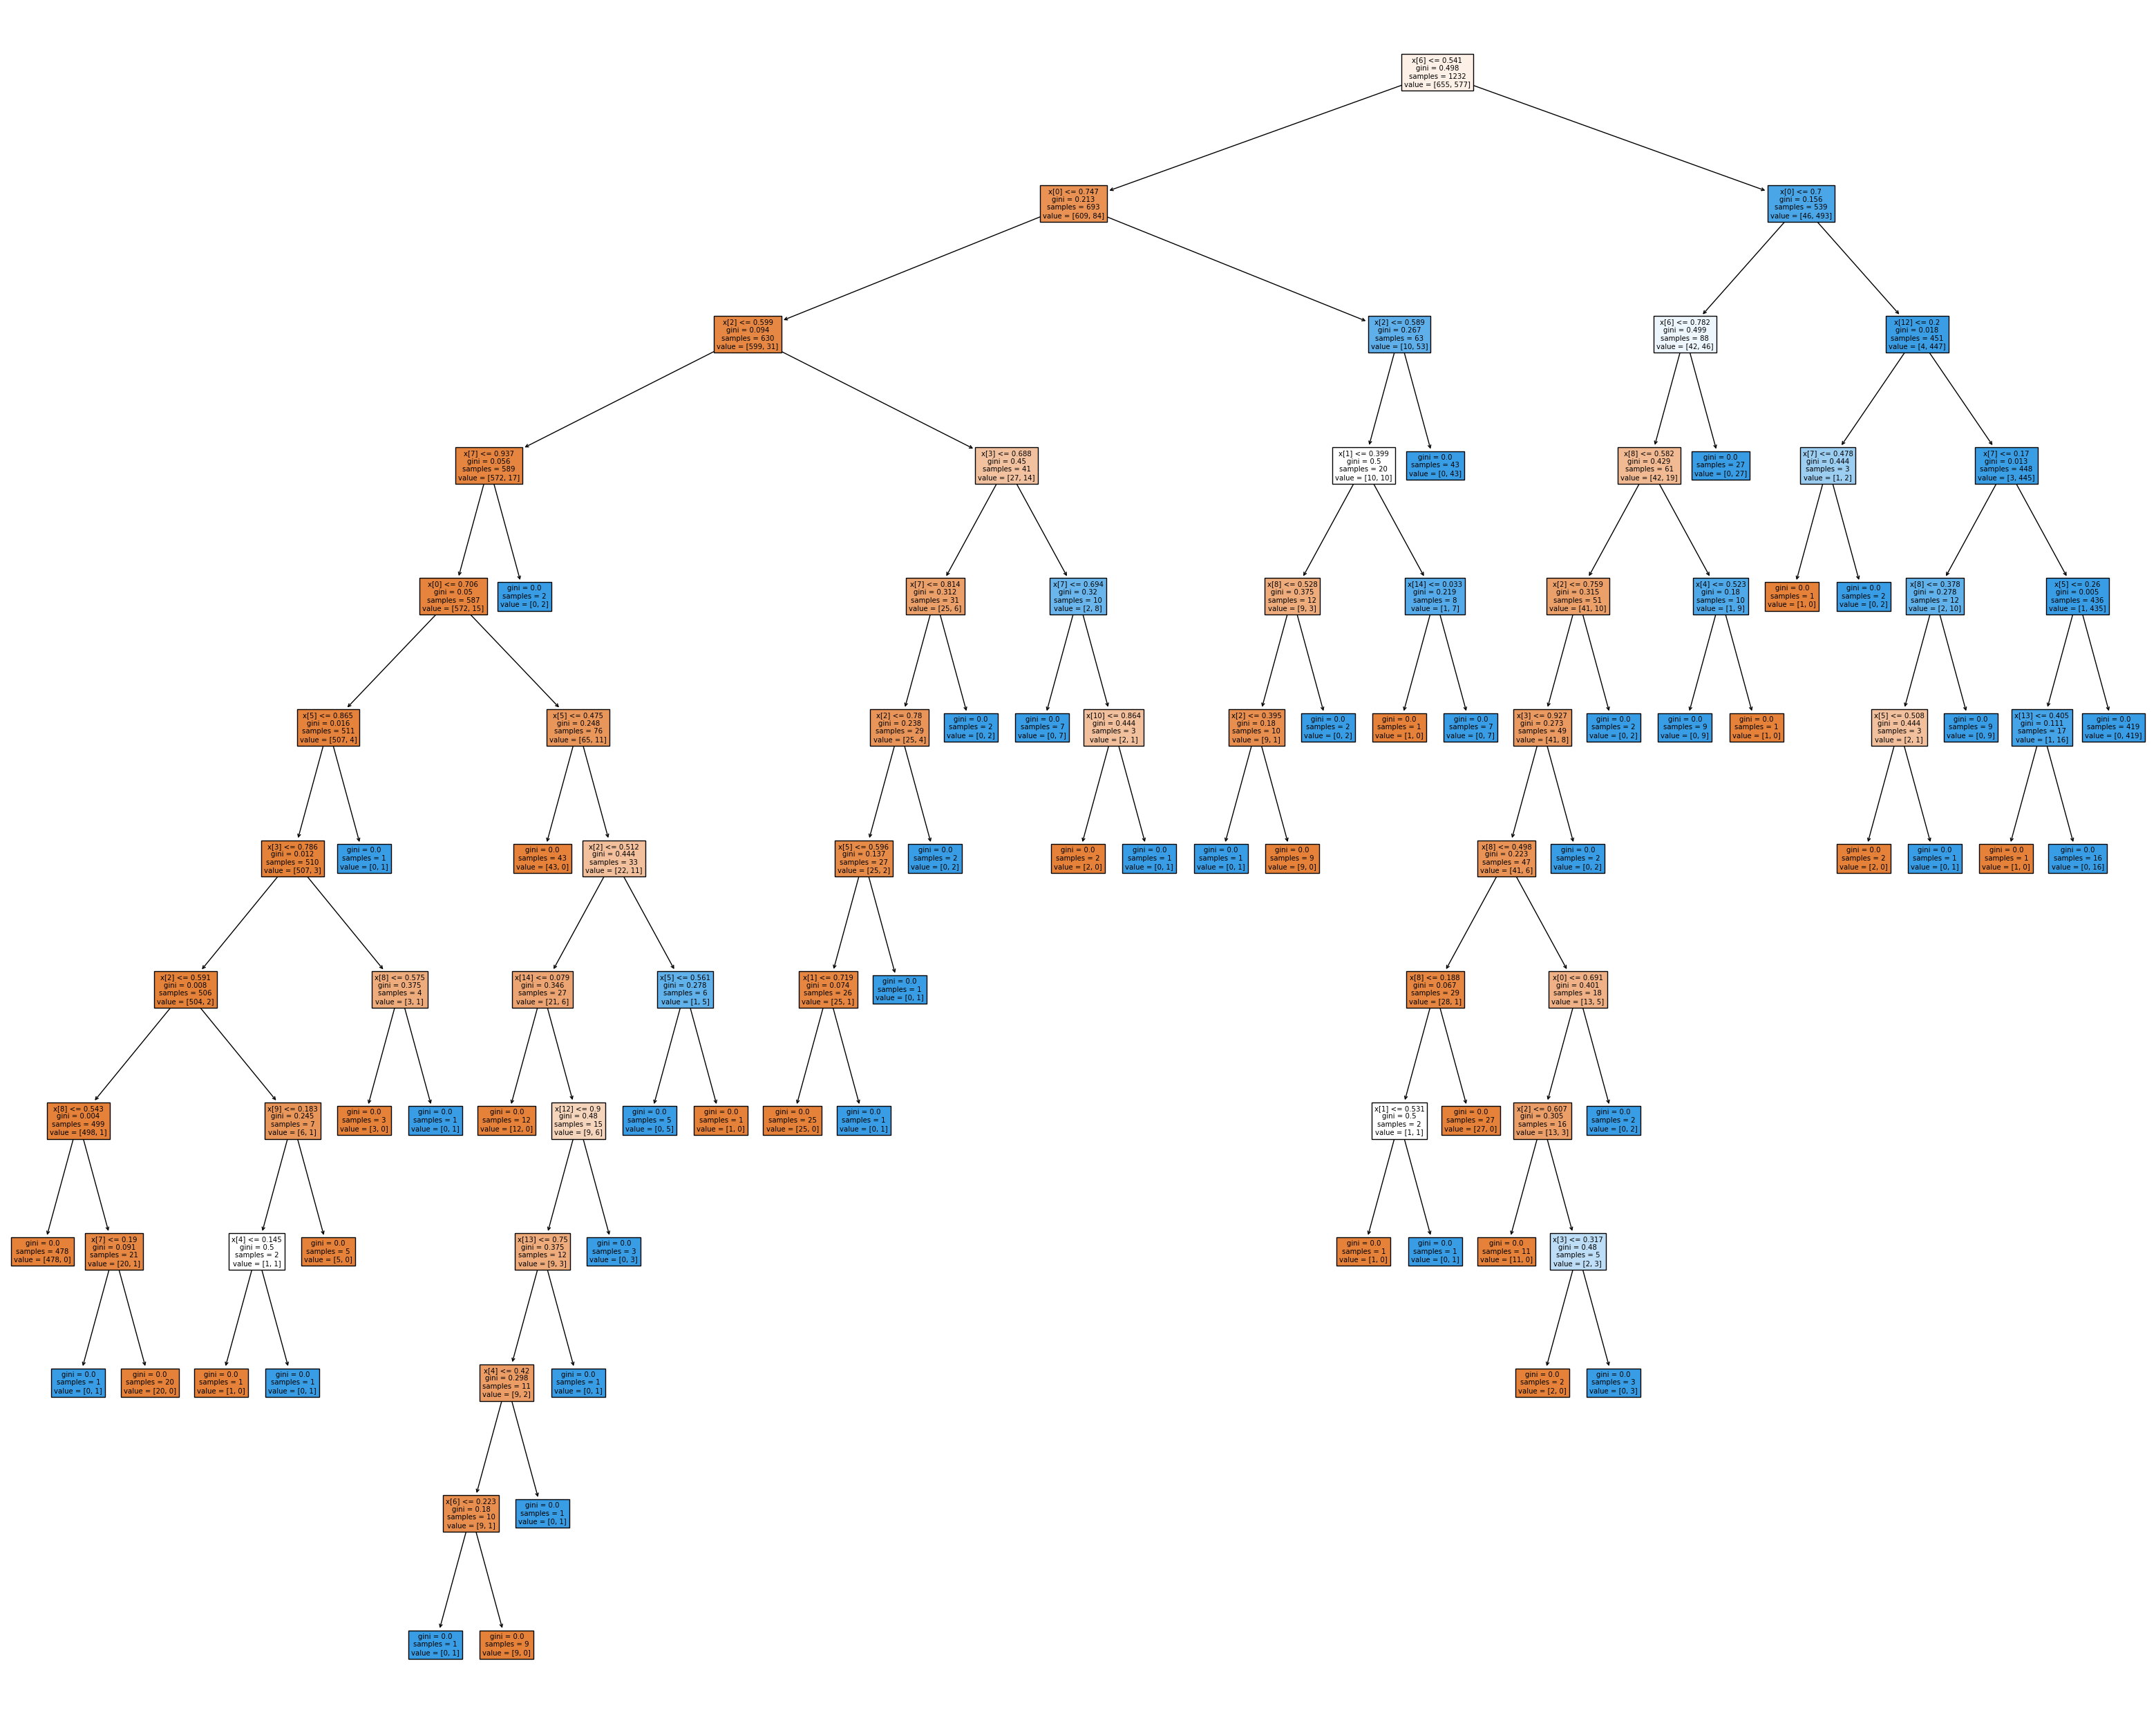

In [240]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

decisionTreeClassifier = DecisionTreeClassifier(criterion='gini')

decisionTreeClassifier.fit(XTrain, YTrain)

YTestPredDT = decisionTreeClassifier.predict(XTest)

print(f"Decision Tree Classifier Accuracy Measures: ")
print(f"F1 Score: {f1_score(YTest, YTestPredDT, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredDT)}")
print(f"Precision: {precision_score(YTest, YTestPredDT, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredDT, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredDT)}")


# Plot The Decision Tree
plt.figure(figsize=(40, 32))
plot_tree(decisionTreeClassifier, filled=True)
plt.show()

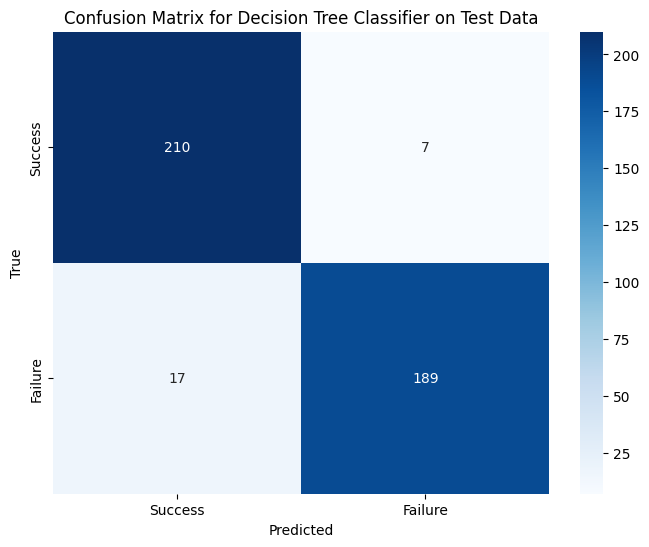

In [241]:
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels and predicted labels
trueLabels = YTest.tolist()
predictedLabels = YTestPredDT.tolist()

# Create confusion matrix
cm = confusion_matrix(trueLabels, predictedLabels)


# Define labels for the matrix
labels = ['Success', 'Failure']

plt.figure(figsize=(8, 6))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Set title
plt.title('Confusion Matrix for Decision Tree Classifier on Test Data')

# Show the plot
plt.show()

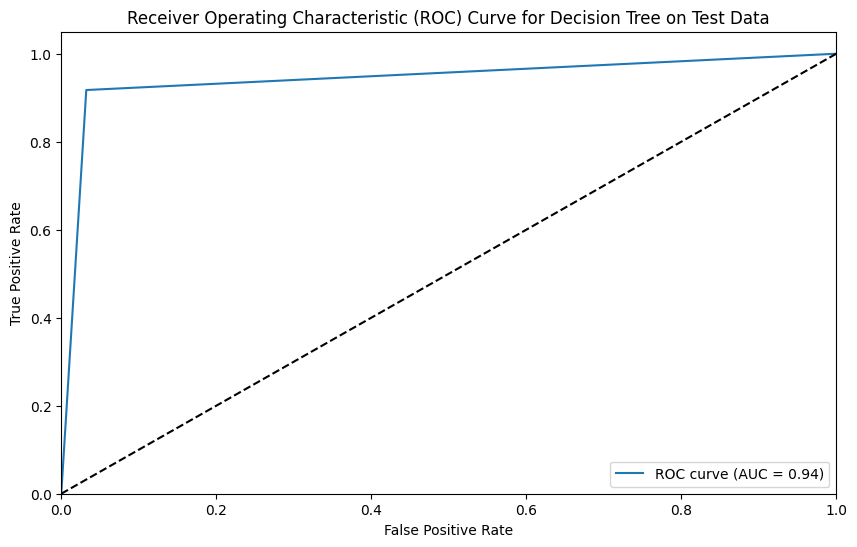

In [242]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(YTest, YTestPredDT)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree on Test Data')
plt.legend(loc="lower right")
plt.show()

#### K-Nearest Neighbors Classifier

In [243]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [5, 10, 15, 20, 30]

for neighbor in neighbors:
    knnClassifier = KNeighborsClassifier(n_neighbors=neighbor)

    knnClassifier.fit(XTrain, YTrain)

    YValPredKNN = knnClassifier.predict(XVal)

    # Evaluate the model on the test set
    print(f'KNN Accuracy Measures For {neighbor} Neighbors')
    print(f"F1 Score: {f1_score(YVal, YValPredKNN, average='weighted')}")
    print(f"Accuracy: {accuracy_score(YVal, YValPredKNN)}")
    print(f"Precision: {precision_score(YVal, YValPredKNN, average='weighted')}")
    print(f"Recall: {recall_score(YVal, YValPredKNN, average='weighted')}")
    print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredKNN)}")
    print('\n')

KNN Accuracy Measures For 5 Neighbors
F1 Score: 0.9234139172708721
Accuracy: 0.9245283018867925
Precision: 0.9335398479301605
Recall: 0.9245283018867925
ROC AUC Score: 0.9148936170212766


KNN Accuracy Measures For 10 Neighbors
F1 Score: 0.8937743074095417
Accuracy: 0.8962264150943396
Precision: 0.912533692722372
Recall: 0.8962264150943396
ROC AUC Score: 0.8829787234042553


KNN Accuracy Measures For 15 Neighbors
F1 Score: 0.9037300651392633
Accuracy: 0.9056603773584906
Precision: 0.9193327864369703
Recall: 0.9056603773584906
ROC AUC Score: 0.8936170212765957


KNN Accuracy Measures For 20 Neighbors
F1 Score: 0.9037300651392633
Accuracy: 0.9056603773584906
Precision: 0.9193327864369703
Recall: 0.9056603773584906
ROC AUC Score: 0.8936170212765957


KNN Accuracy Measures For 30 Neighbors
F1 Score: 0.8837339374845126
Accuracy: 0.8867924528301887
Precision: 0.9059261227743822
Recall: 0.8867924528301887
ROC AUC Score: 0.8723404255319149




In [244]:
knnClassifier = KNeighborsClassifier(n_neighbors=5)

knnClassifier.fit(XTrain, YTrain)

YTestPredKNN = knnClassifier.predict(XTest)

# Evaluate the model on the test set
print(f'KNN Accuracy Measures:')
print(f"F1 Score: {f1_score(YTest, YTestPredKNN, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredKNN)}")
print(f"Precision: {precision_score(YTest, YTestPredKNN, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredKNN, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredKNN)}")

KNN Accuracy Measures:
F1 Score: 0.916578888890091
Accuracy: 0.91725768321513
Precision: 0.927416663250386
Recall: 0.91725768321513
ROC AUC Score: 0.915171580689902


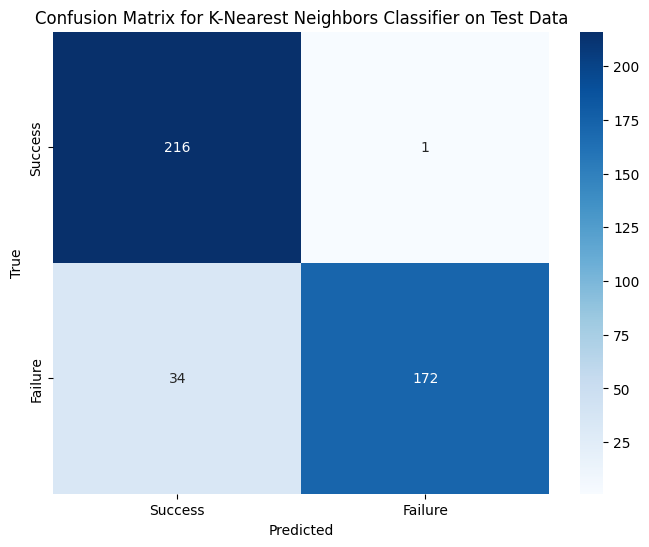

In [245]:
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels and predicted labels
trueLabels = YTest.tolist()
predictedLabels = YTestPredKNN.tolist()

# Create confusion matrix
cm = confusion_matrix(trueLabels, predictedLabels)

# Define labels for the matrix
labels = ['Success', 'Failure']

plt.figure(figsize=(8, 6))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Set title
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier on Test Data')

# Show the plot
plt.show()

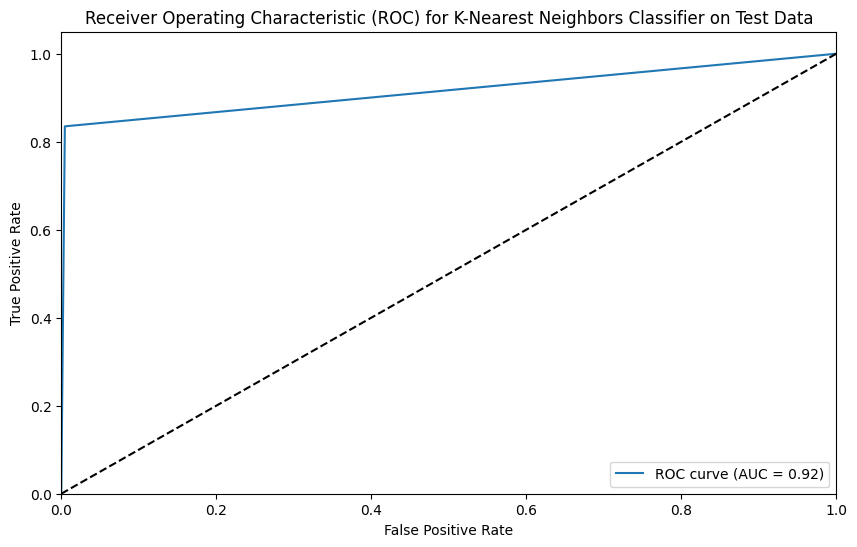

In [246]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(YTest, YTestPredKNN)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for K-Nearest Neighbors Classifier on Test Data')
plt.legend(loc="lower right")
plt.show()

#### Logistic Regression

In [247]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(XTrain, YTrain)

YValPredLR = lr.predict(XVal)

print('Logistic Regression Accuracy Measures:')
print(f"F1 Score: {f1_score(YVal, YValPredLR, average='weighted')}")
print(f"Accuracy: {accuracy_score(YVal, YValPredLR)}")
print(f"Precision: {precision_score(YVal, YValPredLR, average='weighted')}")
print(f"Recall: {recall_score(YVal, YValPredLR, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredLR)}")
print('\n')

Logistic Regression Accuracy Measures:
F1 Score: 0.9140559531554977
Accuracy: 0.9150943396226415
Precision: 0.9214479702687249
Recall: 0.9150943396226415
ROC AUC Score: 0.9064190407500902




In [248]:
lr = LogisticRegression()
lr.fit(XTrain, YTrain)

YTestPredLR = lr.predict(XTest)

print('Logistic Regression Accuracy Measures:')
print(f"F1 Score: {f1_score(YTest, YTestPredLR, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredLR)}")
print(f"Precision: {precision_score(YTest, YTestPredLR, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredLR, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredLR)}")
print('\n')

Logistic Regression Accuracy Measures:
F1 Score: 0.9383541146231741
Accuracy: 0.9385342789598109
Precision: 0.9416125949398924
Recall: 0.9385342789598109
ROC AUC Score: 0.9373853518858216




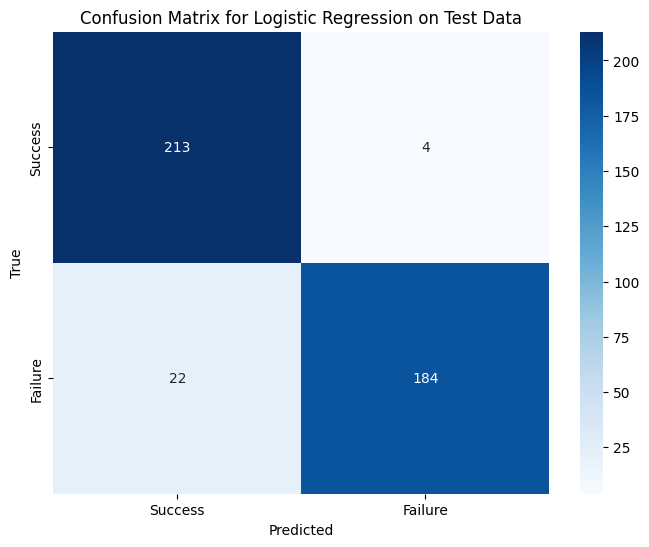

In [249]:
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels and predicted labels
trueLabels = YTest.tolist()
predictedLabels = YTestPredLR.tolist()

# Create confusion matrix
cm = confusion_matrix(trueLabels, predictedLabels)

# Define labels for the matrix
labels = ['Success', 'Failure']

plt.figure(figsize=(8, 6))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Set title
plt.title('Confusion Matrix for Logistic Regression on Test Data')

# Show the plot
plt.show()

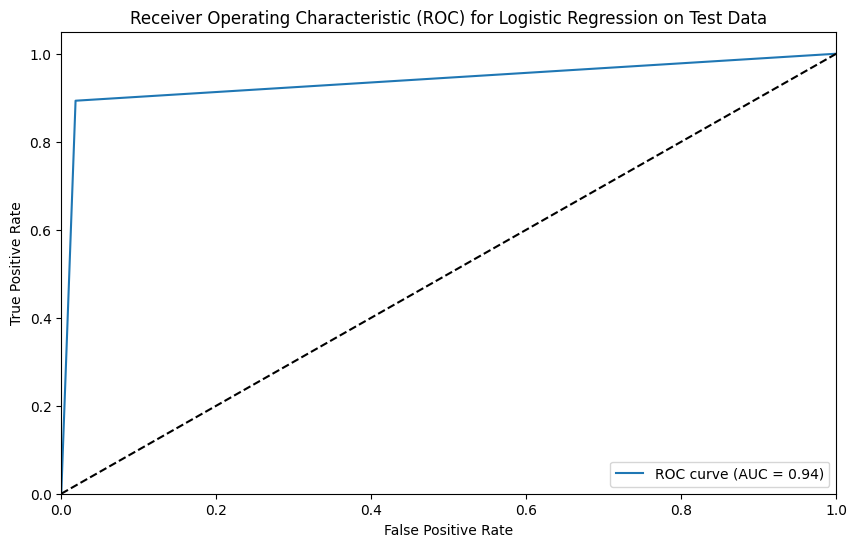

In [250]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(YTest, YTestPredLR)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Logistic Regression on Test Data')
plt.legend(loc="lower right")
plt.show()

#### Support Vector Classifier

In [251]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svmClassifier = SVC(kernel=kernel)

    svmClassifier.fit(XTrain, YTrain)

    YValPredSVM = svmClassifier.predict(XVal)

    # Evaluate the model on the validation set
    print(f'SVM Accuracy Measures with {kernel} Kernel:')
    print(f"F1 Score: {f1_score(YVal, YValPredSVM, average='weighted')}")
    print(f"Accuracy: {accuracy_score(YVal, YValPredSVM)}")
    print(f"Precision: {precision_score(YVal, YValPredSVM, average='weighted')}")
    print(f"Recall: {recall_score(YVal, YValPredSVM, average='weighted')}")
    print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredSVM)}")
    print('\n')

SVM Accuracy Measures with linear Kernel:
F1 Score: 0.923781331267637
Accuracy: 0.9245283018867925
Precision: 0.9292435130447095
Recall: 0.9245283018867925
ROC AUC Score: 0.9170573386224306


SVM Accuracy Measures with poly Kernel:
F1 Score: 0.9331546302320538
Accuracy: 0.9339622641509434
Precision: 0.9409662664379647
Recall: 0.9339622641509434
ROC AUC Score: 0.925531914893617


SVM Accuracy Measures with rbf Kernel:
F1 Score: 0.9430662954943808
Accuracy: 0.9433962264150944
Precision: 0.9455135571853431
Recall: 0.9433962264150944
ROC AUC Score: 0.9383339343671114


SVM Accuracy Measures with sigmoid Kernel:
F1 Score: 0.21779262728844295
Accuracy: 0.2358490566037736
Precision: 0.20315214135968854
Recall: 0.2358490566037736
ROC AUC Score: 0.214028128380815




In [252]:
svmClassifier = SVC(kernel='rbf')

svmClassifier.fit(XTrain, YTrain)

YTestPredSVM = svmClassifier.predict(XTest)

print(f'SVM Accuracy Measures:')
print(f"F1 Score: {f1_score(YTest, YTestPredSVM, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredSVM)}")
print(f"Precision: {precision_score(YTest, YTestPredSVM, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredSVM, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredSVM)}")
print('\n')

SVM Accuracy Measures:
F1 Score: 0.9550041667705527
Accuracy: 0.9550827423167849
Precision: 0.9567429675820965
Recall: 0.9550827423167849
ROC AUC Score: 0.954252606147376




In [253]:
# from sklearn.metrics import confusion_matrix

# # Assuming you have the true labels and predicted labels
# trueLabels = YTest.tolist()
# predictedLabels = YTestPredSVM.tolist()

# # Create confusion matrix
# cm = confusion_matrix(trueLabels, predictedLabels)

# # Define labels for the matrix
# labels = ['Success', 'Failure']

# plt.figure(figsize=(8, 6))

# # Plot confusion matrix
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# # Set axis labels
# plt.xlabel('Predicted')
# plt.ylabel('True')

# # Set title
# plt.title('Confusion Matrix for Support Vector Classifier on Test Data')

# # Show the plot
# plt.show()

In [254]:
# from sklearn.metrics import roc_curve, auc

# # Calculate FPR, TPR, and thresholds
# fpr, tpr, thresholds = roc_curve(YTest, YTestPredSVM)

# # Calculate AUC
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()

## One Hot Encoded Data

In [255]:
## One Hot Encoded Data
moviesOHE.head()

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,...,Release Year,SentimentScore,Budget,Age Rating_G,Age Rating_NC-17,Age Rating_Not Rated,Age Rating_PG,Age Rating_PG-13,Age Rating_R,Box Office Status
0,0.491282,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,...,2009,0.642857,20000000,0,0,0,0,0,1,1
1,-0.027106,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,...,2010,0.830000,19000000,0,0,0,1,0,0,0
2,-0.240635,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,...,2009,0.780000,18000000,0,0,0,0,0,1,0
3,0.132929,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,...,2010,0.880000,80000000,0,0,0,0,0,1,0
4,-0.152381,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,...,2009,0.580000,28000000,0,0,0,1,0,0,0


Splitting The Dataset Into Features And Target Variable

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 1: Split the dataset into features (X) and target variable (Y)
X = moviesOHE.drop('Box Office Status', axis=1)
Y = moviesOHE['Box Office Status']

# Step 2: Normalize the feature values
scaler = MinMaxScaler()
XNormalized = scaler.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
XTrain, XTemp, YTrain, YTemp = train_test_split(XNormalized, Y, test_size=0.3, random_state=42)

XTest, XVal, YTest, YVal = train_test_split(XTemp, YTemp, test_size=0.2, random_state=42)
print(XTrain.shape, XVal.shape, XTest.shape)

(1232, 20) (106, 20) (423, 20)


### Machine Learning Models


#### Random Forest Classifier

In [257]:
from sklearn.ensemble import RandomForestClassifier

trees = [10, 25, 50, 100, 200]

for tree in trees:
    # Create a Random Forest classifier
    randomForestClassifier = RandomForestClassifier(n_estimators=tree, random_state=42)

    # Train the Random Forest on the training data
    randomForestClassifier.fit(XTrain, YTrain)

    # Predict on the validation set
    YValPredRF = randomForestClassifier.predict(XVal)

    # Evaluate the model on the validation set
    print(f"Random Forest Classifier Accuracy Measures With {tree} No. Of Trees:")
    print(f"F1 Score: {f1_score(YVal, YValPredRF, average='weighted')}")
    print(f"Accuracy: {accuracy_score(YVal, YValPredRF)}")
    print(f"Precision: {precision_score(YVal, YValPredRF, average='weighted')}")
    print(f"Recall: {recall_score(YVal, YValPredRF, average='weighted')}")
    print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredRF)}")
    print('\n')

Random Forest Classifier Accuracy Measures With 10 No. Of Trees:
F1 Score: 0.9524639299816785
Accuracy: 0.9528301886792453
Precision: 0.9565153301886793
Recall: 0.9528301886792453
ROC AUC Score: 0.9468085106382979


Random Forest Classifier Accuracy Measures With 25 No. Of Trees:
F1 Score: 0.9715824484263593
Accuracy: 0.9716981132075472
Precision: 0.973067559342666
Recall: 0.9716981132075472
ROC AUC Score: 0.9680851063829787


Random Forest Classifier Accuracy Measures With 50 No. Of Trees:
F1 Score: 0.962044196996254
Accuracy: 0.9622641509433962
Precision: 0.964660077867625
Recall: 0.9622641509433962
ROC AUC Score: 0.9574468085106382


Random Forest Classifier Accuracy Measures With 100 No. Of Trees:
F1 Score: 0.9524639299816785
Accuracy: 0.9528301886792453
Precision: 0.9565153301886793
Recall: 0.9528301886792453
ROC AUC Score: 0.9468085106382979


Random Forest Classifier Accuracy Measures With 200 No. Of Trees:
F1 Score: 0.962044196996254
Accuracy: 0.9622641509433962
Precision: 0.96

In [258]:
randomForestClassifier = RandomForestClassifier(n_estimators=25, random_state=42)

randomForestClassifier.fit(XTrain, YTrain)

YTestPredRF = randomForestClassifier.predict(XTest)

print(f"Random Forest Classifier Accuracy Measures:")
print(f"F1 Score: {f1_score(YTest, YTestPredRF, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredRF)}")
print(f"Precision: {precision_score(YTest, YTestPredRF, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredRF, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredRF)}")

Random Forest Classifier Accuracy Measures:
F1 Score: 0.966903073286052
Accuracy: 0.966903073286052
Precision: 0.966903073286052
Recall: 0.966903073286052
ROC AUC Score: 0.9668806764797996


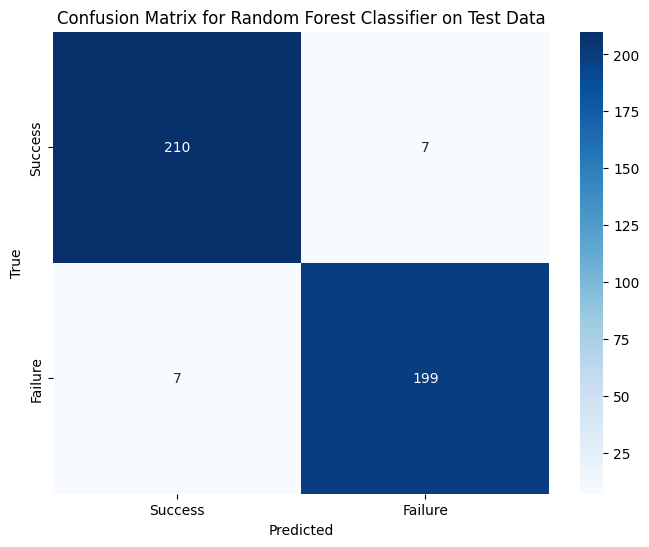

In [259]:
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels and predicted labels
trueLabels = YTest.tolist()
predictedLabels = YTestPredRF.tolist()

# Create confusion matrix
cm = confusion_matrix(trueLabels, predictedLabels)

# Define labels for the matrix
labels = ['Success', 'Failure']

plt.figure(figsize=(8, 6))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Set title
plt.title('Confusion Matrix for Random Forest Classifier on Test Data')

# Show the plot
plt.show()

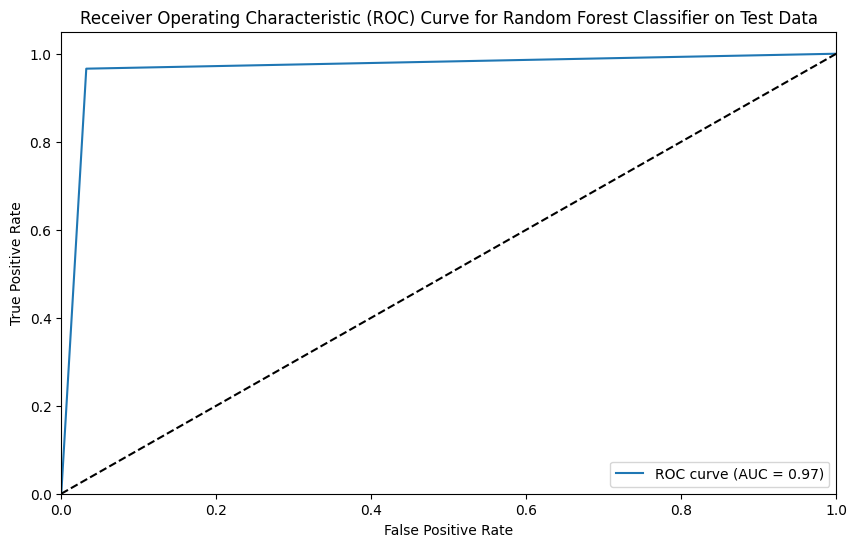

In [260]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(YTest, YTestPredRF)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier on Test Data')
plt.legend(loc="lower right")
plt.show()

#### Decison Tree Classifier

In [261]:
from sklearn.tree import DecisionTreeClassifier

criterions = ['gini', 'entropy']

for criterion in criterions:
    decisionTreeClassifier = DecisionTreeClassifier(criterion=criterion)

    decisionTreeClassifier.fit(XTrain, YTrain)

    YValPredDT = decisionTreeClassifier.predict(XVal)

    print(f"Decision Tree Classifier Accuracy Measures With {criterion} Criterion: ")
    print(f"F1 Score: {f1_score(YVal, YValPredDT, average='weighted')}")
    print(f"Accuracy: {accuracy_score(YVal, YValPredDT)}")
    print(f"Precision: {precision_score(YVal, YValPredDT, average='weighted')}")
    print(f"Recall: {recall_score(YVal, YValPredDT, average='weighted')}")
    print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredDT)}")
    print('\n')

Decision Tree Classifier Accuracy Measures With gini Criterion: 
F1 Score: 0.9430662954943808
Accuracy: 0.9433962264150944
Precision: 0.9455135571853431
Recall: 0.9433962264150944
ROC AUC Score: 0.9383339343671114


Decision Tree Classifier Accuracy Measures With entropy Criterion: 
F1 Score: 0.9147473452790776
Accuracy: 0.9150943396226415
Precision: 0.9159035577933934
Recall: 0.9150943396226415
ROC AUC Score: 0.9107464839523982




In [262]:
decisionTreeClassifier = DecisionTreeClassifier(criterion='entropy')

decisionTreeClassifier.fit(XTrain, YTrain)

YTestPredDT = decisionTreeClassifier.predict(XTest)

print(f"Decision Tree Classifier Accuracy Measures: ")
print(f"F1 Score: {f1_score(YTest, YTestPredDT, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredDT)}")
print(f"Precision: {precision_score(YTest, YTestPredDT, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredDT, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredDT)}")

Decision Tree Classifier Accuracy Measures: 
F1 Score: 0.9503195867262061
Accuracy: 0.950354609929078
Precision: 0.9508067821376386
Recall: 0.950354609929078
ROC AUC Score: 0.9498903852176637


#### K-Nearest Neighbors Classifier

In [263]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [5, 10, 15, 20, 30]

for neighbor in neighbors:
    knnClassifier = KNeighborsClassifier(n_neighbors=neighbor)

    knnClassifier.fit(XTrain, YTrain)

    YValPredKNN = knnClassifier.predict(XVal)

    # Evaluate the model on the test set
    print(f'KNN Accuracy Measures For {neighbor} Neighbors')
    print(f"F1 Score: {f1_score(YVal, YValPredKNN, average='weighted')}")
    print(f"Accuracy: {accuracy_score(YVal, YValPredKNN)}")
    print(f"Precision: {precision_score(YVal, YValPredKNN, average='weighted')}")
    print(f"Recall: {recall_score(YVal, YValPredKNN, average='weighted')}")
    print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredKNN)}")
    print('\n')

KNN Accuracy Measures For 5 Neighbors
F1 Score: 0.9037300651392633
Accuracy: 0.9056603773584906
Precision: 0.9193327864369703
Recall: 0.9056603773584906
ROC AUC Score: 0.8936170212765957


KNN Accuracy Measures For 10 Neighbors
F1 Score: 0.8937743074095417
Accuracy: 0.8962264150943396
Precision: 0.912533692722372
Recall: 0.8962264150943396
ROC AUC Score: 0.8829787234042553


KNN Accuracy Measures For 15 Neighbors
F1 Score: 0.9136078023543394
Accuracy: 0.9150943396226415
Precision: 0.9263318534961154
Recall: 0.9150943396226415
ROC AUC Score: 0.9042553191489362


KNN Accuracy Measures For 20 Neighbors
F1 Score: 0.8837339374845126
Accuracy: 0.8867924528301887
Precision: 0.9059261227743822
Recall: 0.8867924528301887
ROC AUC Score: 0.8723404255319149


KNN Accuracy Measures For 30 Neighbors
F1 Score: 0.8736021536924125
Accuracy: 0.8773584905660378
Precision: 0.8995020964360587
Recall: 0.8773584905660378
ROC AUC Score: 0.8617021276595744




In [264]:
knnClassifier = KNeighborsClassifier(n_neighbors=5)

knnClassifier.fit(XTrain, YTrain)

YTestPredKNN = knnClassifier.predict(XTest)

# Evaluate the model on the test set
print(f'KNN Accuracy Measures:')
print(f"F1 Score: {f1_score(YTest, YTestPredKNN, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredKNN)}")
print(f"Precision: {precision_score(YTest, YTestPredKNN, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredKNN, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredKNN)}")

KNN Accuracy Measures:
F1 Score: 0.9022781269855351
Accuracy: 0.9030732860520094
Precision: 0.912815589171757
Recall: 0.9030732860520094
ROC AUC Score: 0.9009775848955303


#### Linear Regression

In [265]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(XTrain, YTrain)

YValPredLR = lr.predict(XVal)

print('Linear Regression Accuracy Measures:')
print(f"F1 Score: {f1_score(YVal, YValPredLR, average='weighted')}")
print(f"Accuracy: {accuracy_score(YVal, YValPredLR)}")
print(f"Precision: {precision_score(YVal, YValPredLR, average='weighted')}")
print(f"Recall: {recall_score(YVal, YValPredLR, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredLR)}")
print('\n')

Linear Regression Accuracy Measures:
F1 Score: 0.9140559531554977
Accuracy: 0.9150943396226415
Precision: 0.9214479702687249
Recall: 0.9150943396226415
ROC AUC Score: 0.9064190407500902




In [266]:
lr = LogisticRegression()
lr.fit(XTrain, YTrain)

YTestPredLR = lr.predict(XTest)

print('Logistic Regression Accuracy Measures:')
print(f"F1 Score: {f1_score(YTest, YTestPredLR, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredLR)}")
print(f"Precision: {precision_score(YTest, YTestPredLR, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredLR, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredLR)}")
print('\n')

Logistic Regression Accuracy Measures:
F1 Score: 0.9383541146231741
Accuracy: 0.9385342789598109
Precision: 0.9416125949398924
Recall: 0.9385342789598109
ROC AUC Score: 0.9373853518858216




#### Support Vector Classifier

In [267]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svmClassifier = SVC(kernel=kernel)

    svmClassifier.fit(XTrain, YTrain)

    YValPredSVM = svmClassifier.predict(XVal)

    # Evaluate the model on the validation set
    print(f'SVM Accuracy Measures with {kernel} Kernel:')
    print(f"F1 Score: {f1_score(YVal, YValPredSVM, average='weighted')}")
    print(f"Accuracy: {accuracy_score(YVal, YValPredSVM)}")
    print(f"Precision: {precision_score(YVal, YValPredSVM, average='weighted')}")
    print(f"Recall: {recall_score(YVal, YValPredSVM, average='weighted')}")
    print(f"ROC AUC Score: {roc_auc_score(YVal, YValPredSVM)}")
    print('\n')

SVM Accuracy Measures with linear Kernel:
F1 Score: 0.923781331267637
Accuracy: 0.9245283018867925
Precision: 0.9292435130447095
Recall: 0.9245283018867925
ROC AUC Score: 0.9170573386224306


SVM Accuracy Measures with poly Kernel:
F1 Score: 0.9430662954943808
Accuracy: 0.9433962264150944
Precision: 0.9455135571853431
Recall: 0.9433962264150944
ROC AUC Score: 0.9383339343671114


SVM Accuracy Measures with rbf Kernel:
F1 Score: 0.9334495019743498
Accuracy: 0.9339622641509434
Precision: 0.9372613432165319
Recall: 0.9339622641509434
ROC AUC Score: 0.9276956364947712


SVM Accuracy Measures with sigmoid Kernel:
F1 Score: 0.20754716981132076
Accuracy: 0.20754716981132076
Precision: 0.20754716981132076
Recall: 0.20754716981132076
ROC AUC Score: 0.19725928597187162




In [268]:
svmClassifier = SVC(kernel='poly')

svmClassifier.fit(XTrain, YTrain)

YTestPredSVM = svmClassifier.predict(XTest)

print(f'SVM Accuracy Measures:')
print(f"F1 Score: {f1_score(YTest, YTestPredSVM, average='weighted')}")
print(f"Accuracy: {accuracy_score(YTest, YTestPredSVM)}")
print(f"Precision: {precision_score(YTest, YTestPredSVM, average='weighted')}")
print(f"Recall: {recall_score(YTest, YTestPredSVM, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(YTest, YTestPredSVM)}")
print('\n')

SVM Accuracy Measures:
F1 Score: 0.9573632791617663
Accuracy: 0.9574468085106383
Precision: 0.9593944766817107
Recall: 0.9574468085106383
ROC AUC Score: 0.9565567536128138




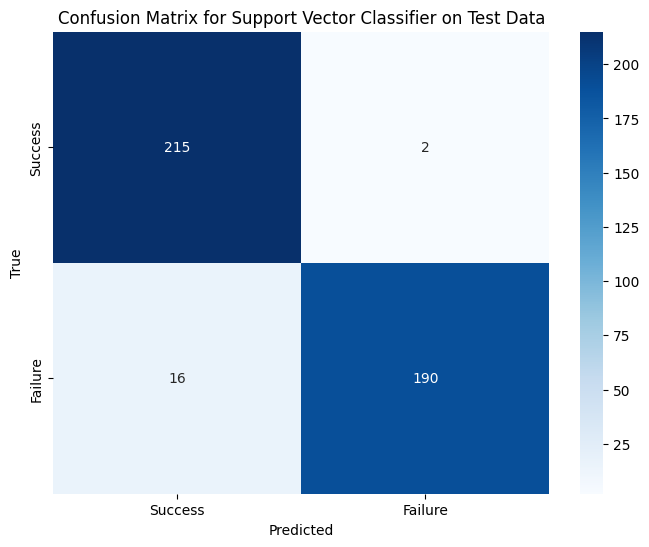

In [269]:
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels and predicted labels
trueLabels = YTest.tolist()
predictedLabels = YTestPredSVM.tolist()

# Create confusion matrix
cm = confusion_matrix(trueLabels, predictedLabels)

# Define labels for the matrix
labels = ['Success', 'Failure']

plt.figure(figsize=(8, 6))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Set title
plt.title('Confusion Matrix for Support Vector Classifier on Test Data')

# Show the plot
plt.show()

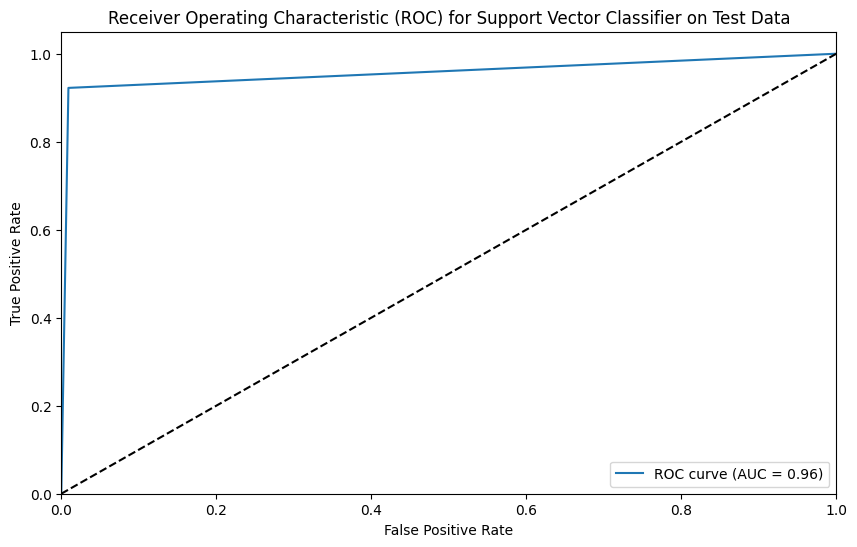

In [270]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(YTest, YTestPredSVM)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Support Vector Classifier on Test Data')
plt.legend(loc="lower right")
plt.show()